Accuracy: 0.9298701298701298


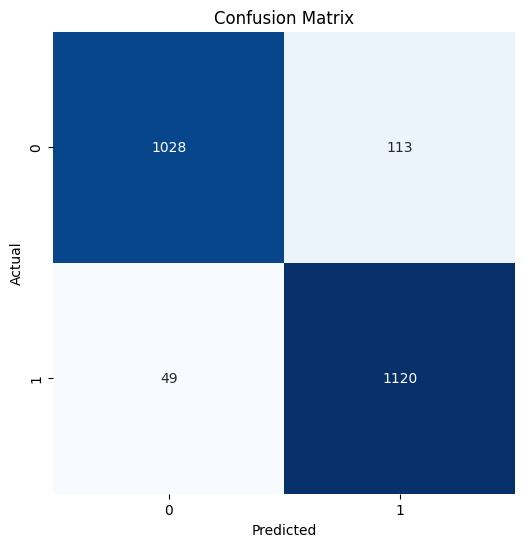

AUC: 0.9807748969320655


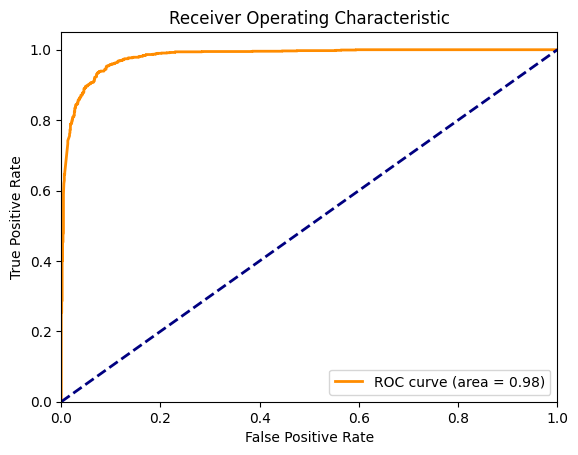

MoviePy - Writing audio in audio_input.mp3


MoviePy - Done.


Trump science tax government spending bills into law
XGB Prediction: True News


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc

df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

df_fake["class"] = 0
df_true["class"] = 1

# Concatenate the datasets
df = pd.concat([df_fake, df_true], axis=0)

# Text preprocessing function
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df["title"] = df["title"].apply(wordopt)

# Split the dataset into training and testing sets
x = df["title"]
y = df["class"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.05)

# Convert text to vectors using TF-IDF
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# XGBoost Classifier
XGB = xgb.XGBClassifier(random_state=42)
XGB_fit = XGB.fit(xv_train, y_train)
XGB_pred = XGB.predict(xv_test)

# Calculate accuracy
xgb_acc = accuracy_score(XGB_pred, y_test)
print("Accuracy:", xgb_acc)

# Generate the confusion matrix
confusion = confusion_matrix(y_test, XGB_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Calculate AUC
y_scores = XGB.predict_proba(xv_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc)

# Create the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Voice Recognition
import speech_recognition as sr
from pydub import AudioSegment
import moviepy.editor as mp

clip = mp.VideoFileClip("input_video.mp4")
clip.audio.write_audiofile("audio_input.mp3")

UserVoiceRecognizer = sr.Recognizer()

try:
    mp3_file_path = r"audio_input.mp3"

    audio = AudioSegment.from_mp3(mp3_file_path)
    wav_file_path = 'output.wav'
    audio.export(wav_file_path, format='wav')

    with sr.AudioFile(wav_file_path) as source:
        UserVoiceRecognizer.adjust_for_ambient_noise(source, duration=0.5)
        UserVoiceInput = UserVoiceRecognizer.listen(source)

        UserVoiceInput_converted_to_Text = UserVoiceRecognizer.recognize_google(UserVoiceInput)
        UserInput = UserVoiceInput_converted_to_Text.lower()

        print(UserVoiceInput_converted_to_Text)

        output_text_file = 'output.txt'
        with open(output_text_file, 'w') as text_file:
            text_file.write(UserVoiceInput_converted_to_Text)

except KeyboardInterrupt:
    print('A Keyboard Interrupt encountered; Terminating the Program !!!')
except sr.UnknownValueError:
    print("No speech detected or could not be recognized.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

testing_news = {"text": [UserInput]}
new_def_test = pd.DataFrame(testing_news)
new_def_test["text"] = new_def_test["text"].apply(wordopt)
new_x_test = new_def_test["text"]
new_xv_test = vectorization.transform(new_x_test)
pred_XGB = XGB.predict(new_xv_test)

# Print the classification result
print("XGB Prediction:", output_label(pred_XGB[0]))

